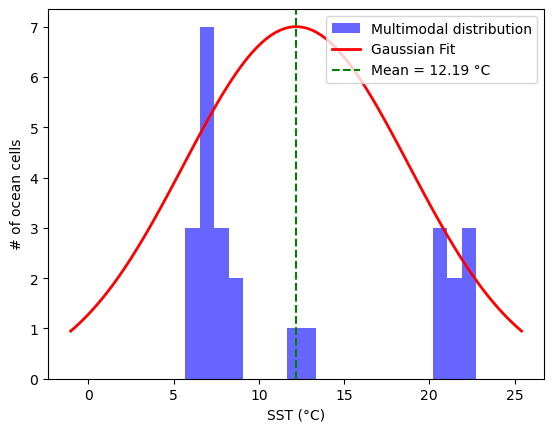

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N1 = 8
N2 = 15
N3 = 2
mu, sigma = 2100, 100
mu2, sigma2 = 700, 100
mu3, sigma3 = 1200, 100
X1 = np.random.normal(mu, sigma, N1) / 100
X2 = np.random.normal(mu2, sigma2, N2) / 100
X3 = np.random.normal(mu3, sigma3, N3) / 100
X = np.concatenate([X1, X2, X3])

# Create histogram without density=True
hist, bins, _ = plt.hist(X, bins=20, alpha=0.6, color='b', label='Multimodal distribution')

# Fit a Gaussian curve centered at the mean value
mu_curve, sigma_curve = norm.fit(X)
x_range = np.linspace(mu_curve - 2 * sigma_curve, mu_curve + 2 * sigma_curve, 100)  # Extend the range
y_fit = norm.pdf(x_range, mu_curve, sigma_curve)

# Scale the Gaussian curve to match the highest histogram count
scaling_factor = max(hist) / max(y_fit)
y_fit_scaled = y_fit * scaling_factor

# Plot the scaled Gaussian curve
plt.plot(x_range, y_fit_scaled, 'r-', lw=2, label='Gaussian Fit')

# Add a horizontal line for the mean value
mean_value = np.mean(X)
plt.axvline(x=mean_value, color='g', linestyle='--', label=f'Mean = {mean_value:.2f} °C')

plt.xlabel('SST (°C)')
plt.ylabel('# of ocean cells')
plt.legend(loc='upper right')  # Move the legend to the top right
plt.savefig('ocean_cells_with_extended_gaussian.png', dpi=300)
plt.show()
